# Analysis of auxin distribution in seedling hooks

In [1]:
%matplotlib inline

In [2]:
import pandas as pd
from matplotlib import pyplot as pl
import numpy as np
from mpl_toolkits.axes_grid1.inset_locator import inset_axes
from math import factorial
from scipy.optimize import curve_fit
from scipy import stats
import numpy as np

The raw data of the measurements found in excel files is imported

In our case, data from three variants:

- DR5-GUS en Col-0
- DR5-GUS en hyl1-2
- DR5-GUS en se-1

In [3]:
xl = pd.ExcelFile()
xl1 = pd.ExcelFile()
xl2 = pd.ExcelFile()

In [20]:
xl.sheet_names
xl1.sheet_names
xl2.sheet_names

In [5]:
df = xl.parse("DR52dD")
df1 = xl1.parse("HD2dD")
df2 = xl2.parse("SD2dD")

In [21]:
df.columns
df1.columns
df2.columns

In [7]:
datosCol=dict([[x,np.array(df[x][:-1])] for x in df.columns])
datosHyl=dict([[x,np.array(df1[x][:-1])] for x in df1.columns])
datosSer=dict([[x,np.array(df2[x][:-1])] for x in df2.columns])

In [22]:
datosCol

In [9]:
XCol=datosCol["X"]
XHyl=datosHyl["X"]
XSer=datosSer["X"]

In [10]:
YCol=datosCol["Y"]
YHyl=datosHyl["Y"]
YSer=datosSer["Y"]

Bins of equal width are created in x, the average for each bin is calculated in y (bin_means).

In [11]:
binCol_means, binCol_edges, binnumberCol = stats.binned_statistic(XCol, YCol, statistic='mean', bins=128)
binHyl_means, binHyl_edges, binnumberHyl = stats.binned_statistic(XHyl, YHyl, statistic='mean', bins=171)
binSer_means, binSer_edges, binnumberSer = stats.binned_statistic(XSer, YSer, statistic='mean', bins=147)

The standard deviation is calculated for each bin.

In [12]:
binCol_std, binCol_edges_std, binnumberCol_std = stats.binned_statistic(XCol, YCol, statistic='std', bins=128)
binHyl_std, binHyl_edges_std, binnumberHyl_std = stats.binned_statistic(XHyl, YHyl, statistic='std', bins=171)
binSer_std, binSer_edges_std, binnumberSer_std = stats.binned_statistic(XSer, YSer, statistic='std', bins=147)

The center of each bin is defined in order to determined a single value of x to plot error bars.

In [13]:
binCol_width = (binCol_edges[1] - binCol_edges[0])
binCol_centers = binCol_edges[1:] - binCol_width/2

binHyl_width = (binHyl_edges[1] - binHyl_edges[0])
binHyl_centers = binHyl_edges[1:] - binHyl_width/2

binSer_width = (binSer_edges[1] - binSer_edges[0])
binSer_centers = binSer_edges[1:] - binSer_width/2

The average of each bin is plotted with its respective error bars.

In [14]:
pl.rcParams.update({'font.family':"times new roman"})
pl.rc('xtick', labelsize=20) 
pl.rc('ytick', labelsize=20)
pl.rcParams['axes.linewidth'] = 1.5

Text(0.5, 1.0, '2dD')

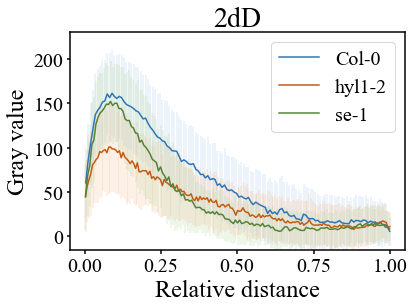

In [15]:
pl.plot(binCol_centers, binCol_means,'-', color='#2E75B6', label='Col-0')
pl.errorbar(binCol_centers, binCol_means, binCol_std, linestyle='none', color='#9DC3E6', alpha=0.25, marker='')

pl.plot(binHyl_centers, binHyl_means,'-', color='#C55A11', label='hyl1-2')
pl.errorbar(binHyl_centers, binHyl_means, binHyl_std, linestyle='none', color='#F4B183', alpha=0.25, marker='')

pl.plot(binSer_centers, binSer_means,'-', color='#548235', label='se-1')
pl.errorbar(binSer_centers, binSer_means, binSer_std, linestyle='none', color='#A9D18E', alpha=0.25, marker='')


ax = pl.gca()
ax.set_ylim([-15,230])
ax.set_yticks([0,50,100,150,200])
ax.tick_params(width=1.5)
pl.legend(bbox_to_anchor=(5, 3))
pl.legend(loc='upper right')
pl.legend(fontsize=20)
pl.xlabel("Relative distance", fontsize=24)
pl.ylabel("Gray value", fontsize=24)
pl.title("2dD", fontweight='bold', fontsize=28)

The average value of Xa for each genotype is represented as the shaded area under the curve.

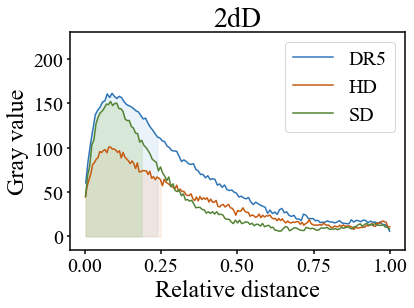

In [18]:
pl.plot(binCol_centers, binCol_means,'-', color='#2E75B6', label='DR5')
pl.fill_between(binCol_centers,binCol_means, 
                where=[(binCol_centers > 0) and (binCol_centers < 0.244961077) for binCol_centers in binCol_centers],
                color='#9DC3E6',alpha=0.2)

pl.plot(binHyl_centers, binHyl_means,'-', color='#C55A11', label='HD')
pl.fill_between(binHyl_centers,binHyl_means, 
                where=[(binHyl_centers > 0) and (binHyl_centers < 0.253321451) for binHyl_centers in binHyl_centers],
                color='#F4B183',alpha=0.2)

pl.plot(binSer_centers, binSer_means,'-', color='#548235', label='SD')
pl.fill_between(binSer_centers,binSer_means, 
                where=[(binSer_centers > 0) and (binSer_centers < 0.188839726) for binSer_centers in binSer_centers],
                color='#A9D18E',alpha=0.3)


ax = pl.gca()
ax.set_ylim([-15,230])
ax.set_yticks([0,50,100,150,200])
ax.tick_params(width=1.5)
pl.legend(bbox_to_anchor=(5, 3))
pl.legend(loc='upper right')
pl.legend(fontsize=20)
pl.xlabel("Relative distance", fontsize=24)
pl.ylabel("Gray value", fontsize=24)
pl.title("2dD", fontweight='bold', fontsize=28)